# QuickGuide for Rtings

[프로젝트 페이지: Research-on-the-TV-market](https://github.com/xikest/research-market-tv)

## Env setting: Install requirements

In [1]:
!pip install -U openpyxl tqdm --q
!pip install -U requests selenium beautifulsoup4 --q
!pip install -U plotly streamlit --q
!pip install -U mkt-retv xik_tools --q

In [2]:
from tools.web import Installer
Installer.install_chrome_and_driver()

# Data prepare

- Input model list
- `Choose` one of the following methods

## Env. Import

In [1]:
from market_research.scraper import Rtings, Rurlsearcher, Rvisualizer

### 1. use search engine

In [4]:
rurlsearcher = Rurlsearcher()

In [5]:
urls_dict = rurlsearcher.get_urls_with_model_info()

## Get data

- `check` url search results and `edit` them to use

In [2]:
rtings = Rtings()
data_dict = rtings.get_data(urls_dict)

# plot

- seaborn plot color map: https://seaborn.pydata.org/tutorial/color_palettes.html  
- plotly plot color map: https://plotly.com/python/builtin-colorscales/

In [2]:
measurement_dict = {"measurement": data_dict.get("measurement")}
scores_dict = {"scores": data_dict.get("scores")}

In [32]:
measurement_dict = {"measurement": data}

In [2]:
import pandas as pd
json_path = './json/rtings_measurement_data.json'
data = pd.read_json(json_path, orient='records', lines=True)

In [ ]:
lst9d ls03c z9k

In [24]:
data = data[~(data.series == 'z9k')]

In [27]:
data[(data.series == 'z9k')]

,category,header,score,label,result_value,maker,year,series


In [26]:
data.to_json('rtings_measurement_data.json', orient='records', lines=True)

In [5]:
['Std. Dev. w/ L.D.', '1440p VRR Maximum', 'Contrast with local dimming','Normalized DCI P3 Coverage ITP','Normalized Rec 2020 Coverage ITP']

,category,header,score,label,result_value,maker,year,series
0,Design,Borders,,Borders,"0.47"" (1.2 cm)",sony,2024,s30
1,Design,Thickness,,Max Thickness,"2.80"" (7.1 cm)",sony,2024,s30
2,Picture Quality,Contrast,2.8,Contrast,"1,864 : 1",sony,2024,s30
3,Picture Quality,Contrast,2.8,Native Contrast,"1,864 : 1",sony,2024,s30
4,Picture Quality,Lighting Zone Transitions,10,Dimming Zones Count Of Tested TV,N/A,sony,2024,s30
...,...,...,...,...,...,...,...,...
6146,Sound Quality,Distortion,6.8,IMD @ Max,2.97%,samsung,2023,ls03c
6147,Smart Features,Interface,8.5,Time Taken to Select YouTube,2 s,samsung,2023,ls03c
6148,Smart Features,Interface,8.5,Time Taken to Change Backlight,5 s,samsung,2023,ls03c
6149,Smart Features,Misc,,Power Consumption,57 W,samsung,2023,ls03c


In [34]:
dd = rvisualizer.dataset.get('normal')

In [35]:
dd[dd['label']== 'Normalized Rec 2020 Coverage ITP']


,category,score,label,result_value,maker,year,series


## Rtings score

In [33]:
rvisualizer = Rvisualizer(measurement_dict)
# rvisualizer.heatmap_scores()

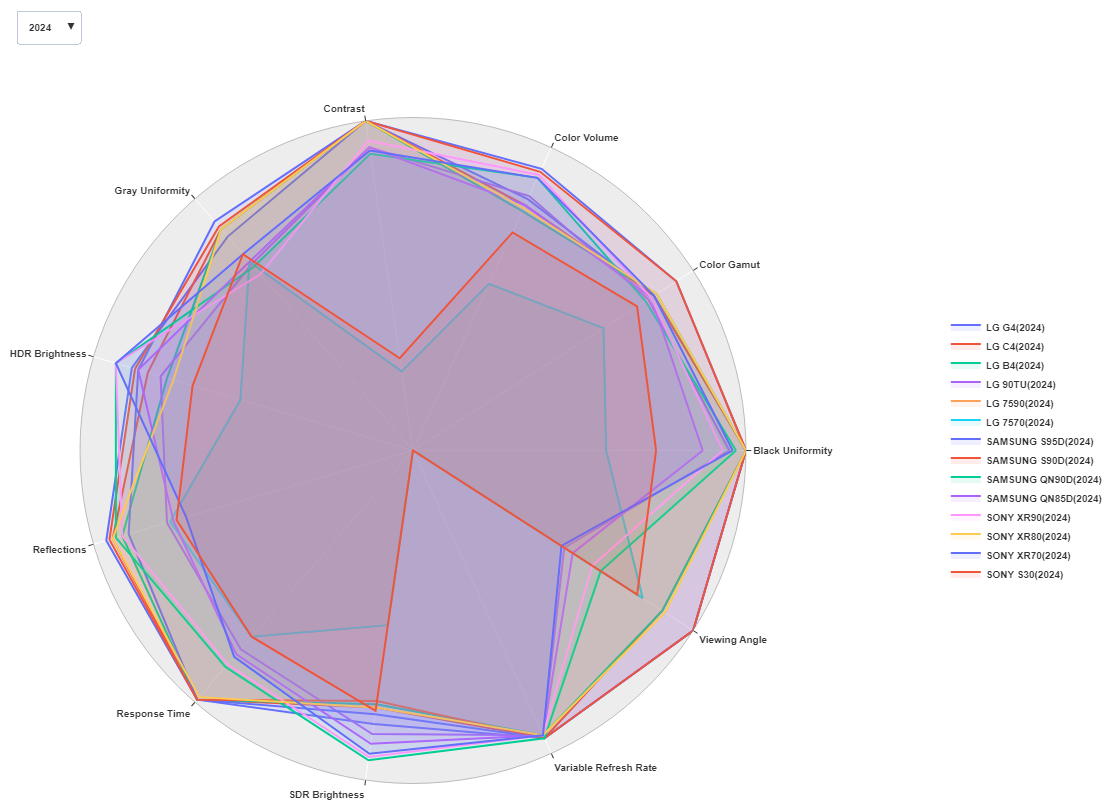

In [6]:
rvisualizer = Rvisualizer(measurement_dict)
rvisualizer.radar_scores()

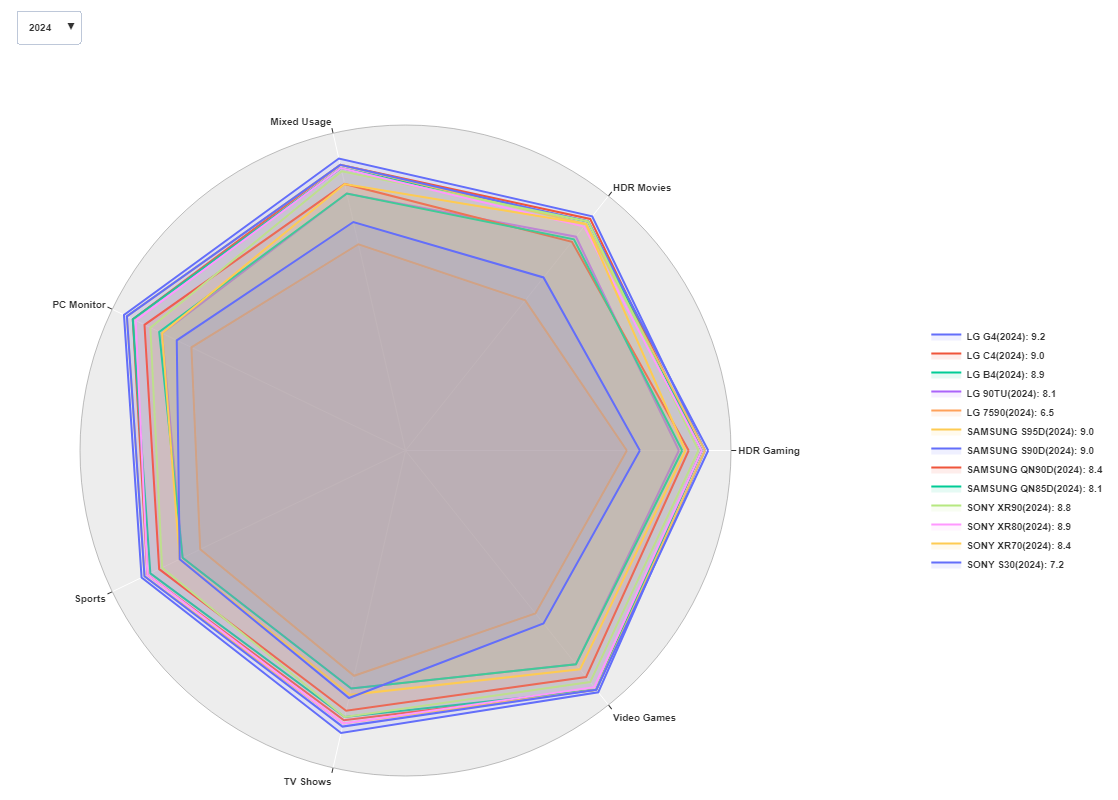

In [7]:
rvisualizer = Rvisualizer(scores_dict)
rvisualizer.radar_scores()

## PCA: Principal component analysis

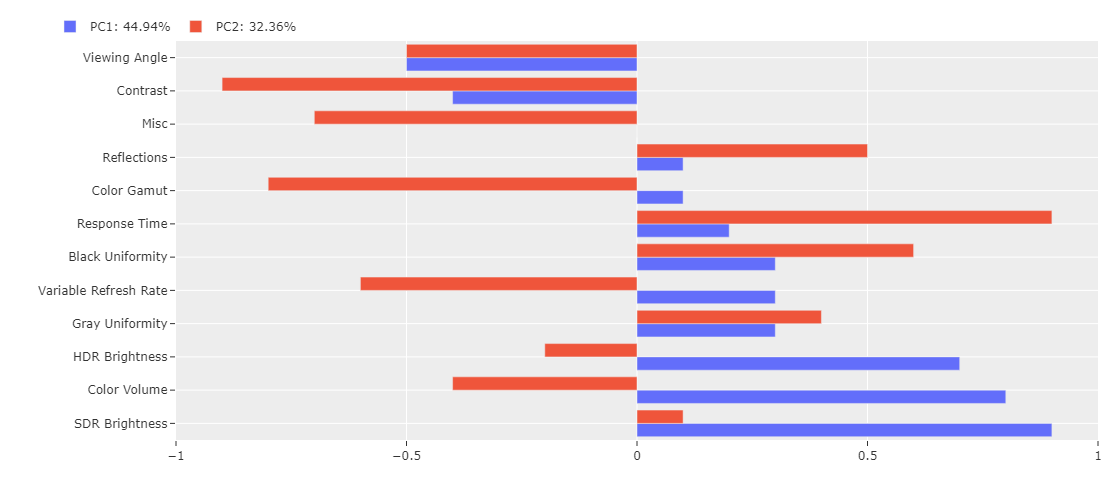

In [8]:
rvisualizer = Rvisualizer(measurement_dict)
rvisualizer.plot_pca()

## Plot detail

In [10]:
rvisualizer = Rvisualizer(measurement_dict)
subcategories = Rvisualizer.get_measurement_selection()

HDR Brightness
----------------------------------------------------------------------------------------------------


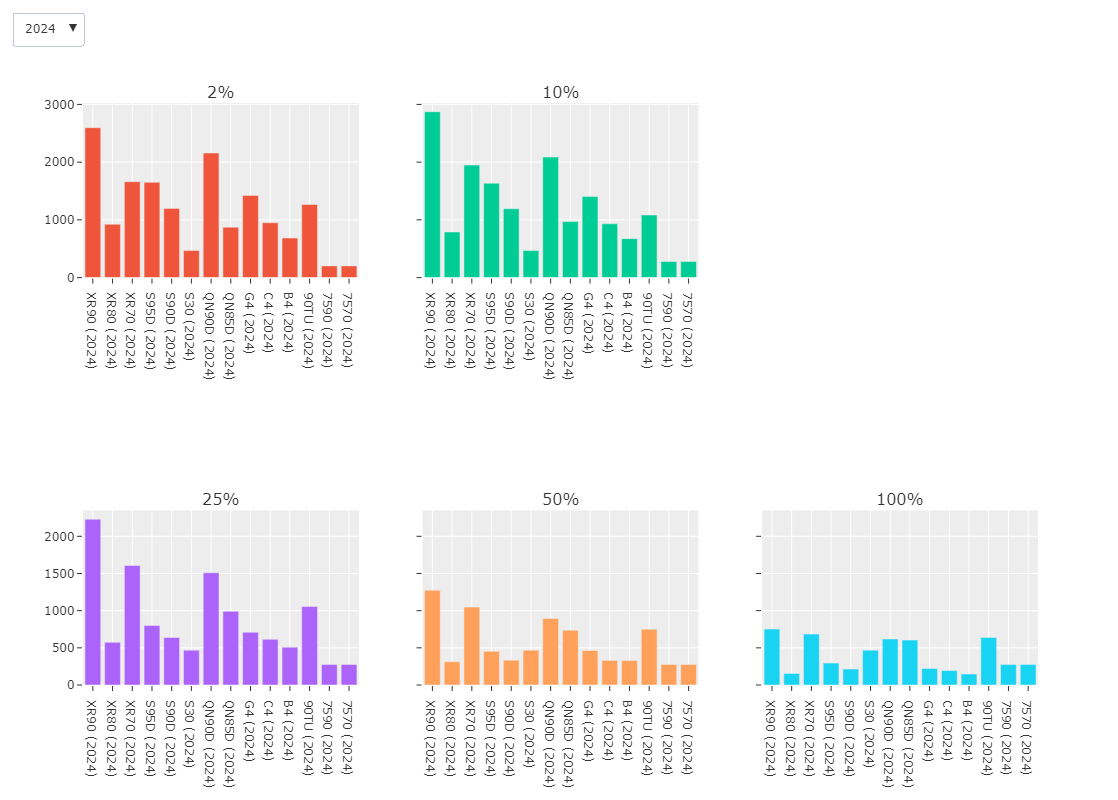

SDR Brightness
----------------------------------------------------------------------------------------------------


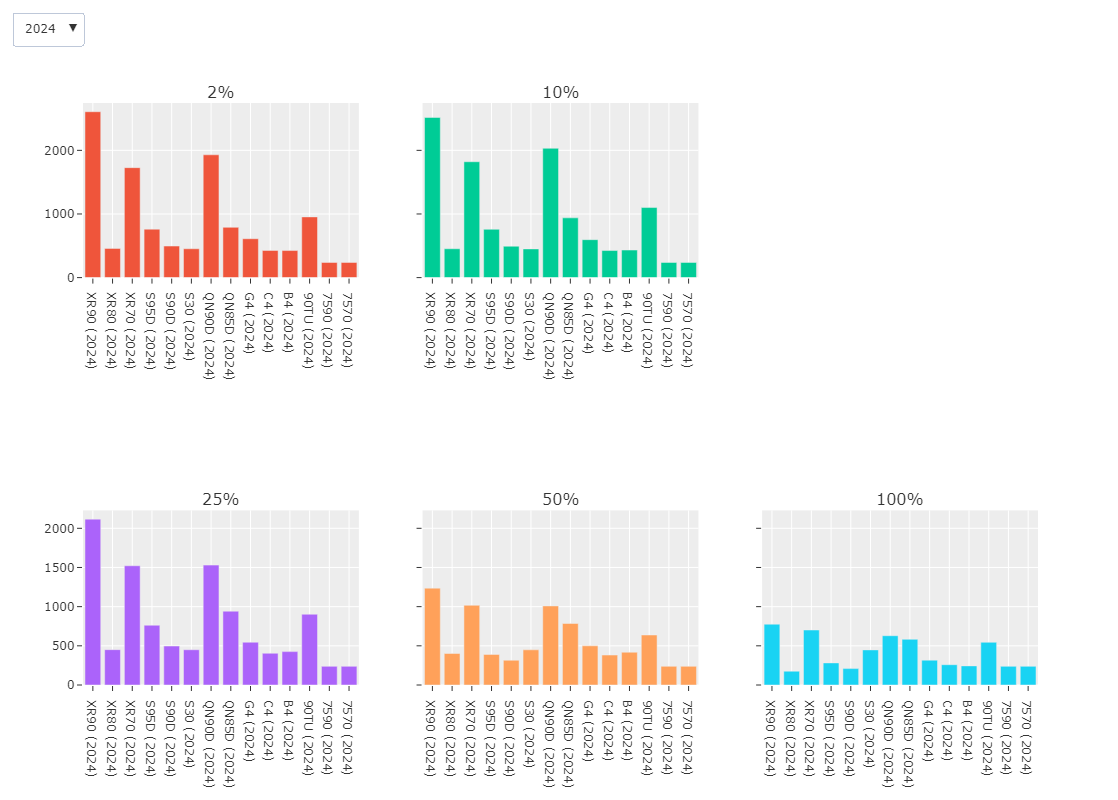

Contrast
----------------------------------------------------------------------------------------------------


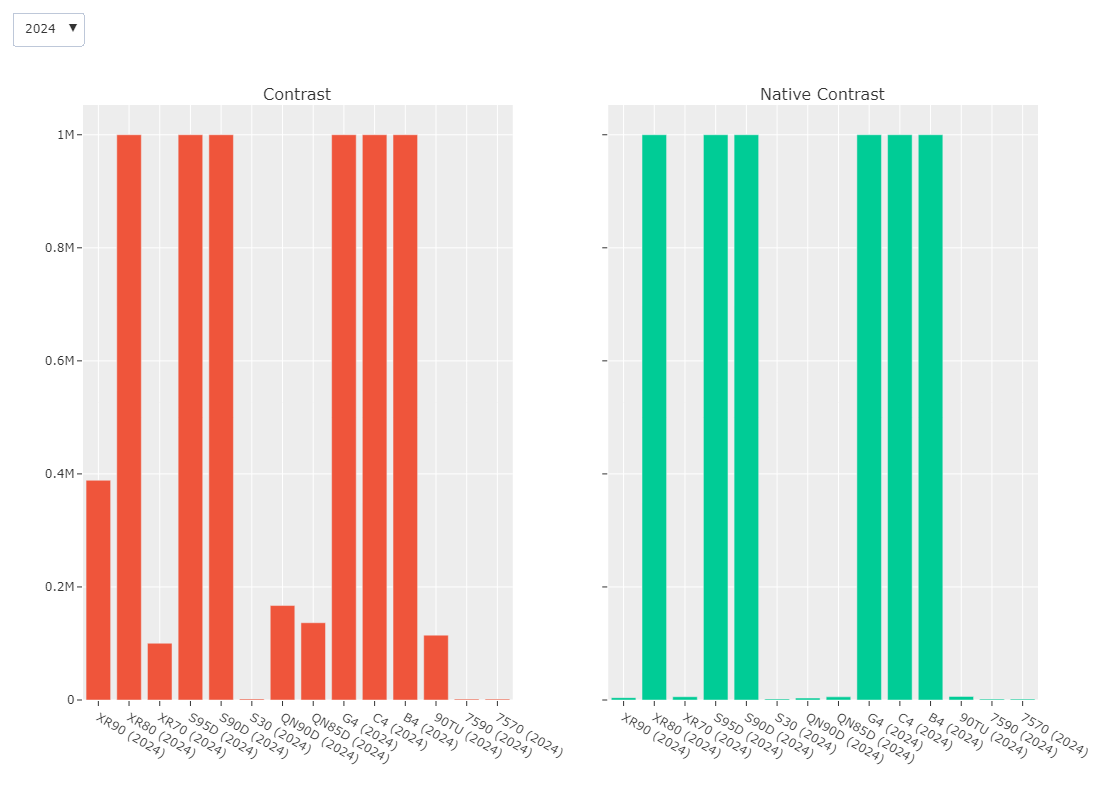

Black Uniformity
----------------------------------------------------------------------------------------------------


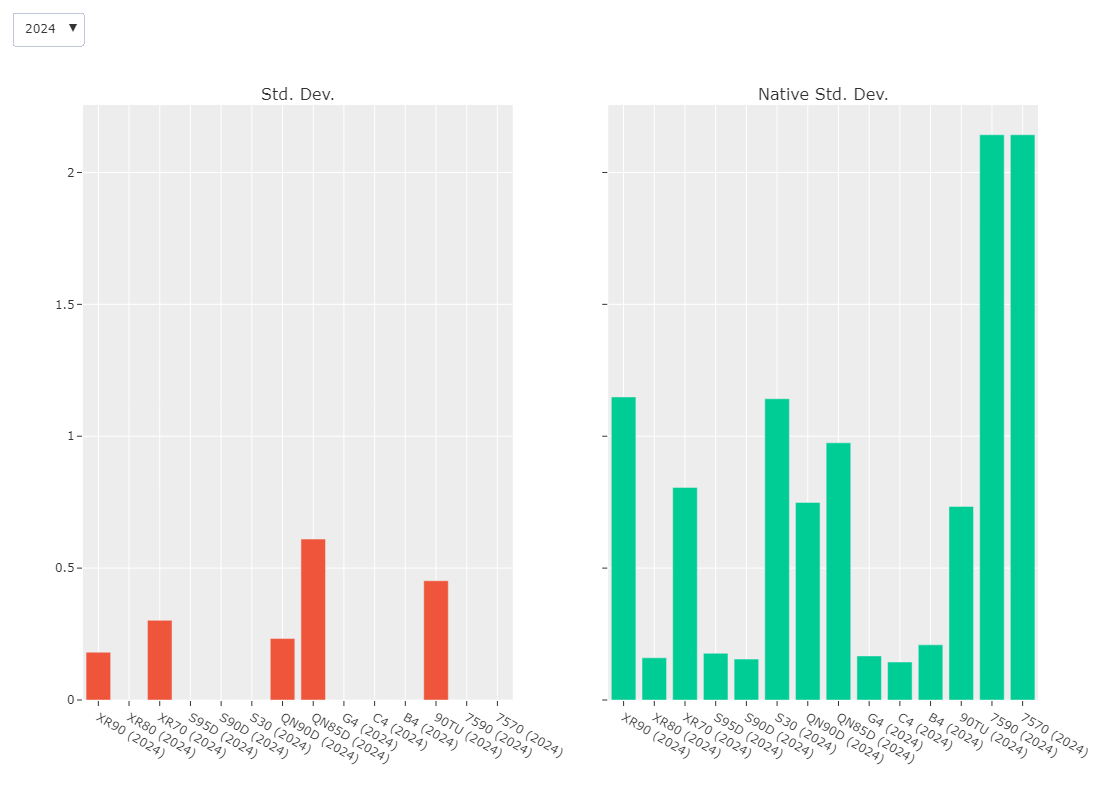

Color Gamut
----------------------------------------------------------------------------------------------------


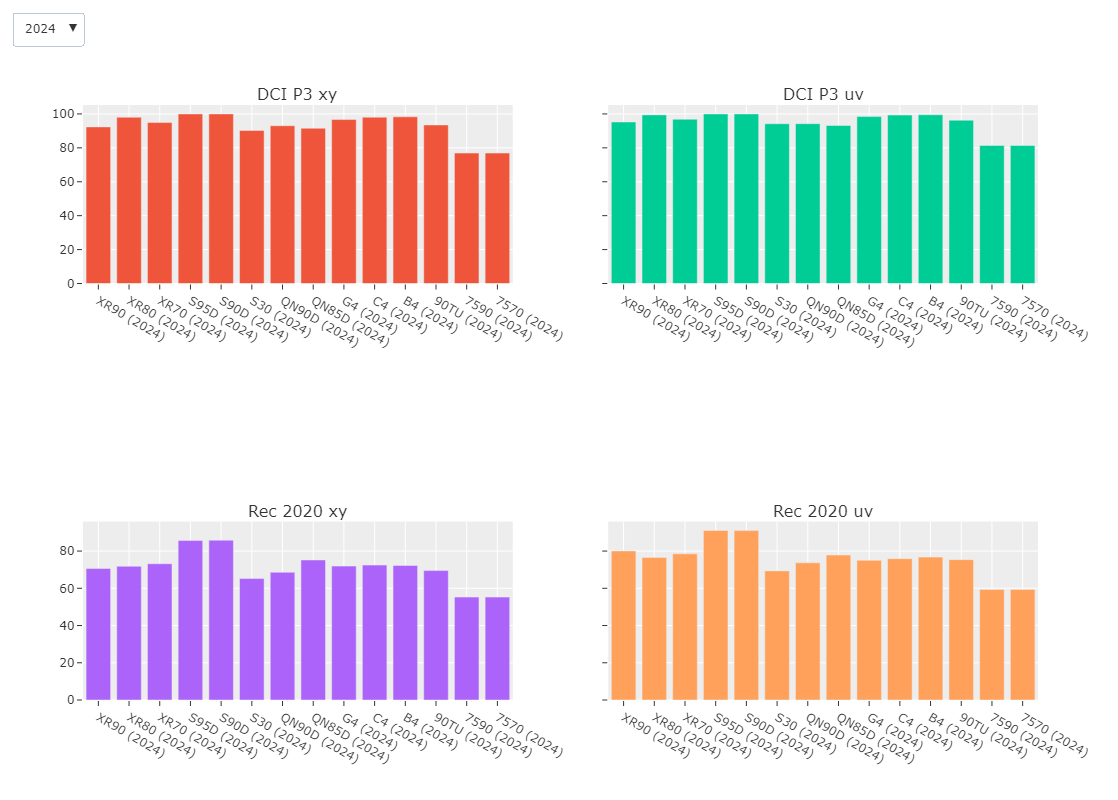

Color Volume
----------------------------------------------------------------------------------------------------


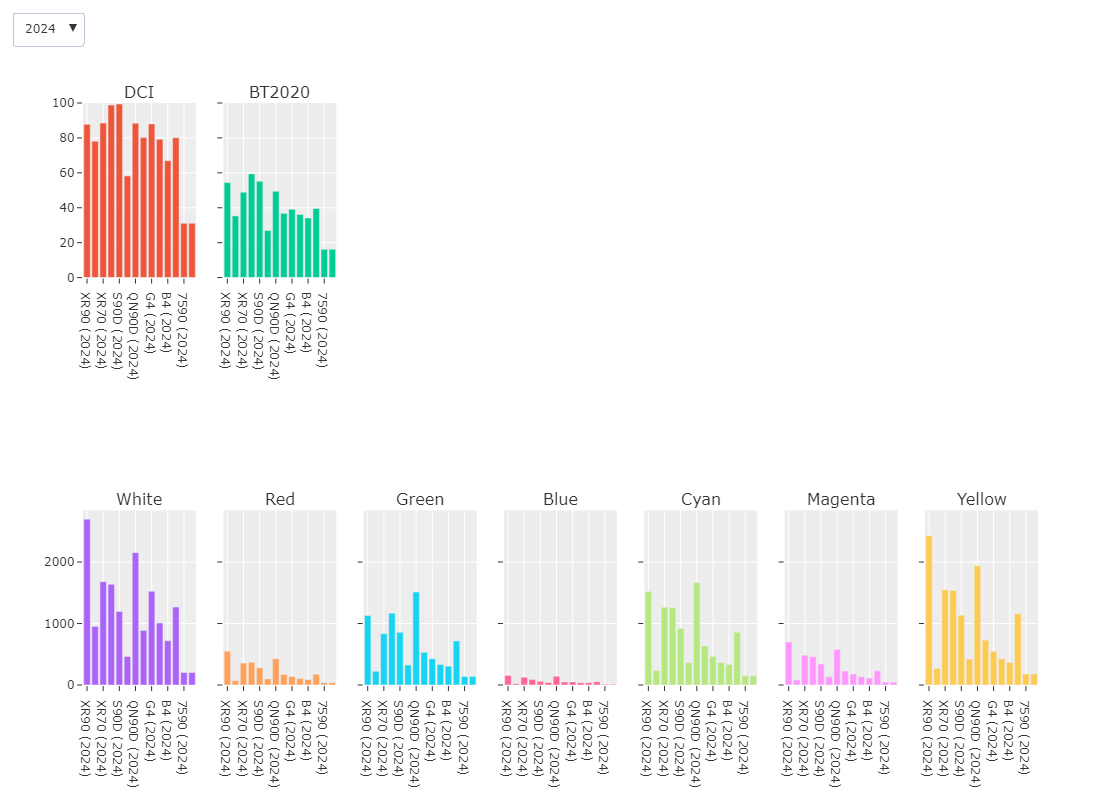

Viewing Angle
----------------------------------------------------------------------------------------------------


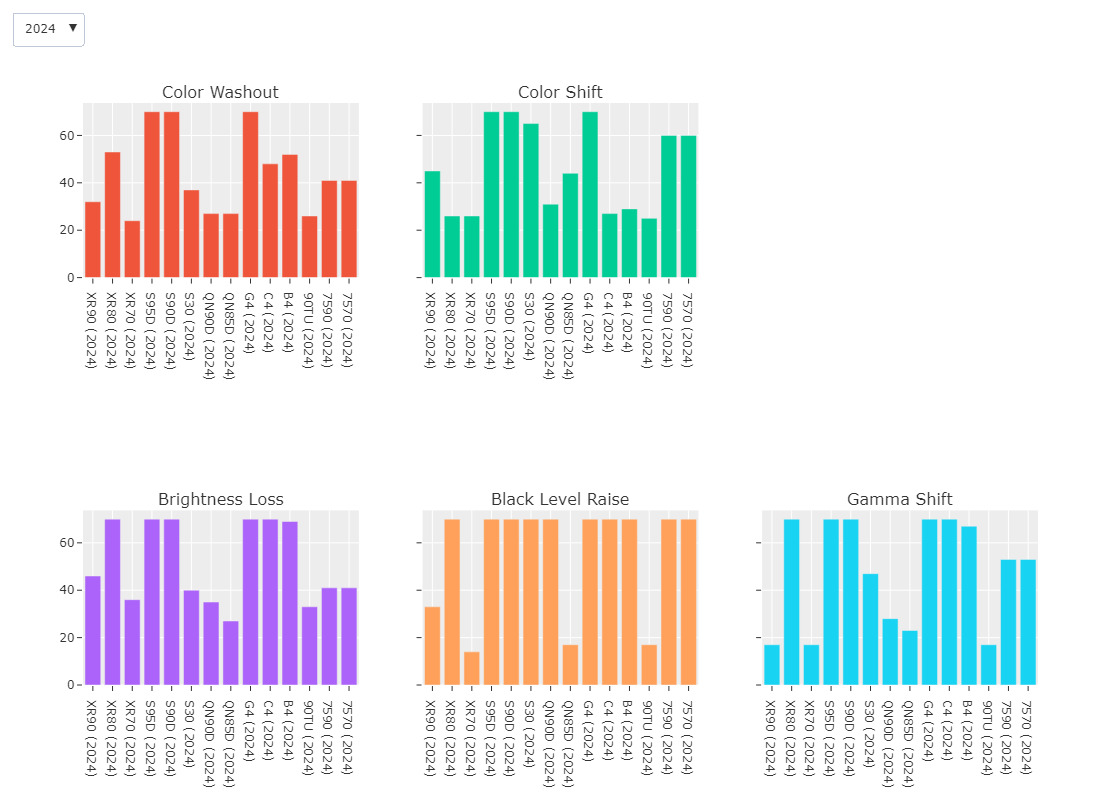

Reflections
----------------------------------------------------------------------------------------------------


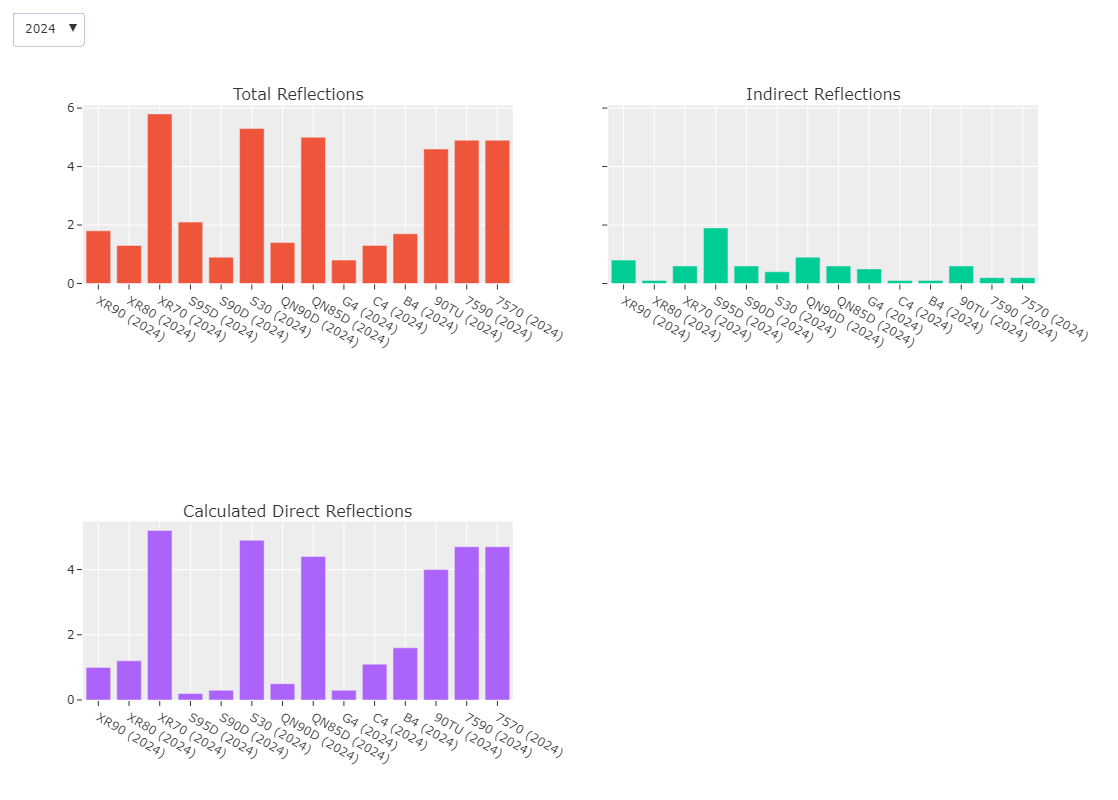

Gray Uniformity
----------------------------------------------------------------------------------------------------


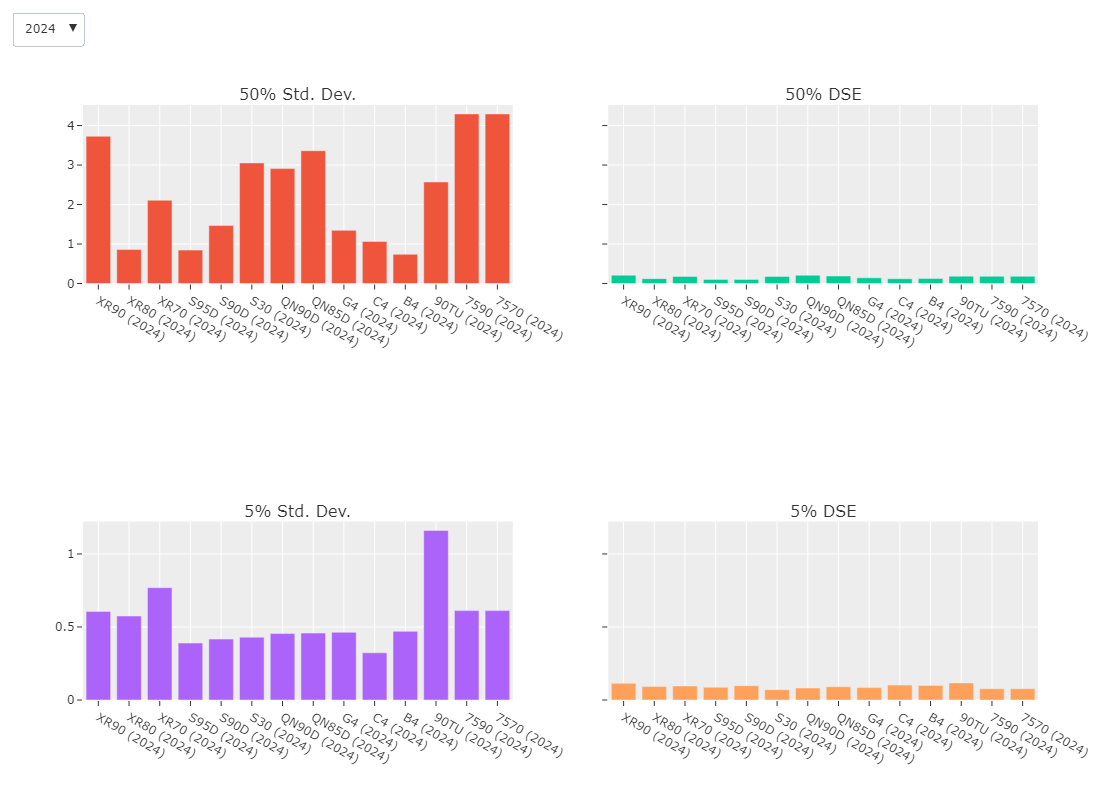

Response Time
----------------------------------------------------------------------------------------------------


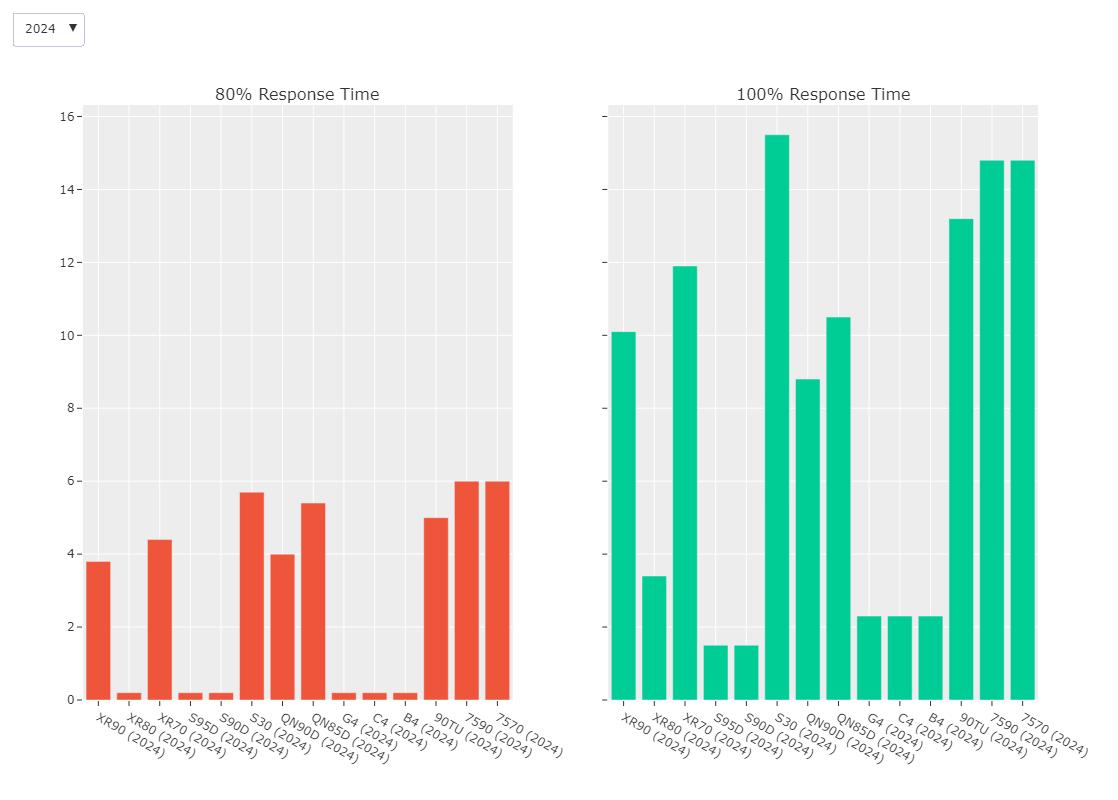

Misc
----------------------------------------------------------------------------------------------------


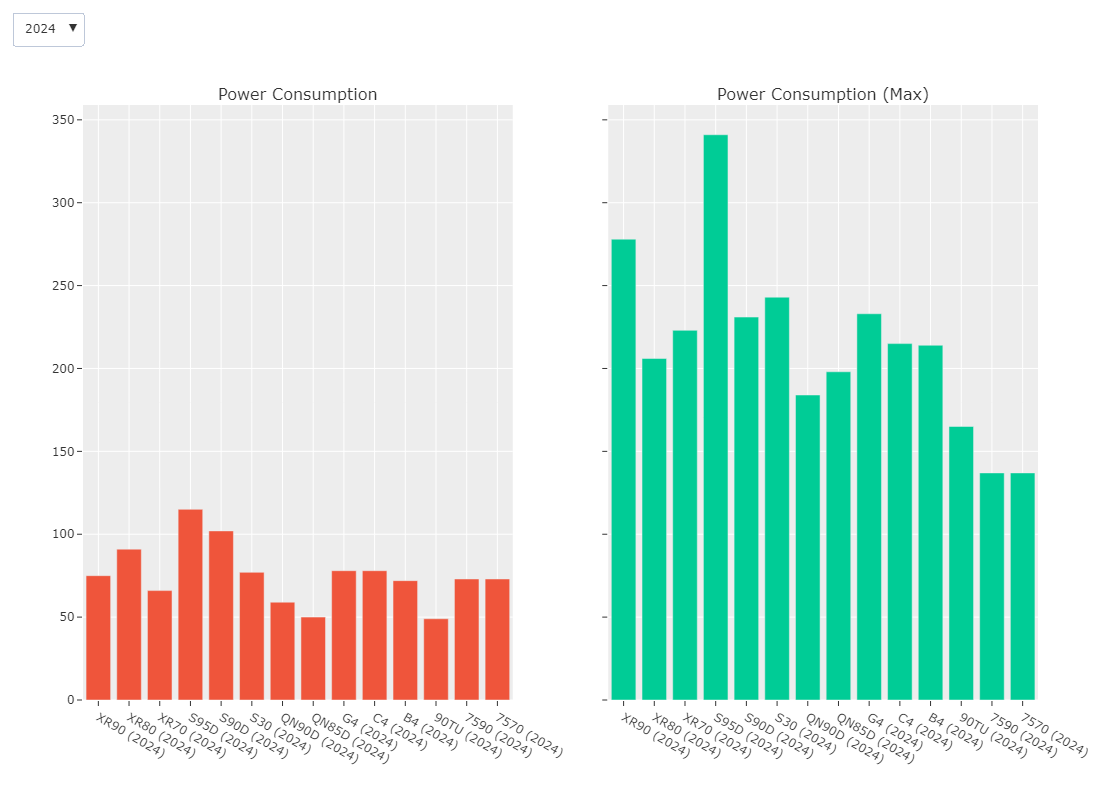

Variable Refresh Rate
----------------------------------------------------------------------------------------------------


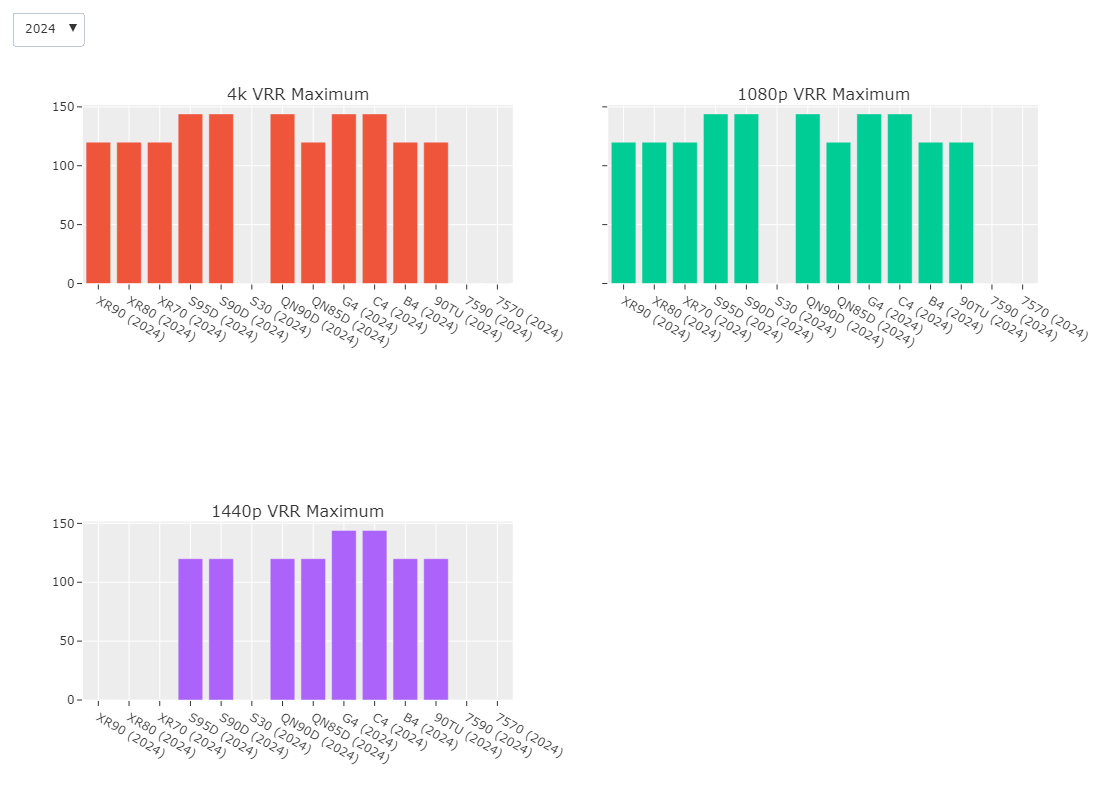

In [9]:
for subcategory in subcategories:
    print(subcategory)
    print("-"*100)
    rvisualizer.plot_facet_bar(subcategory)

# colab에서 파일 받기

In [1]:
from google.colab import files
!zip -r /content/results.zip /content/results
files.download('/content/results.zip')

---